# Generating True Posterior
In this notebook, true posteriors are generated for different simulation datasets. There are five true posteriors for five simulation dataset: [['Gaussian XOR', 'Uniform XOR', 'Spiral', 'Gaussian R-XOR', 'Gaussian S-XOR']]

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import seaborn as sns

colors = sns.diverging_palette(150, 275, s=80, l=55, n=2) #green to purple
colors[0], colors[1] = colors[1], colors[0] # switch colors
cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-14 03:42:27.709195


## Generating spiral true posterior
In order to construct a true posterior for spiral dataset, the "skeletal" backbone was laid out where gaussian posterior is drawn at each point

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
for i in tqdm(range(5)):
    pass

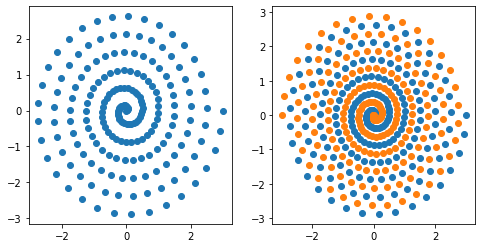

In [5]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ib.get_spiralCenter(**dict(N=400, rng=3))
a,b = ib.spiral

ax[0].scatter(a[:,0],a[:,1])
ax[1].scatter(a[:,0],a[:,1])
ax[1].scatter(b[:,0],b[:,1])

At each spiral center, gaussian posterior is drawn. Below plot demonstrates this idea with the function of the number of spiral centers

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\src\dataset_generator.py:225: RuntimeWarning: invalid value encountered in double_scalars
  return p0/(p0+p1)


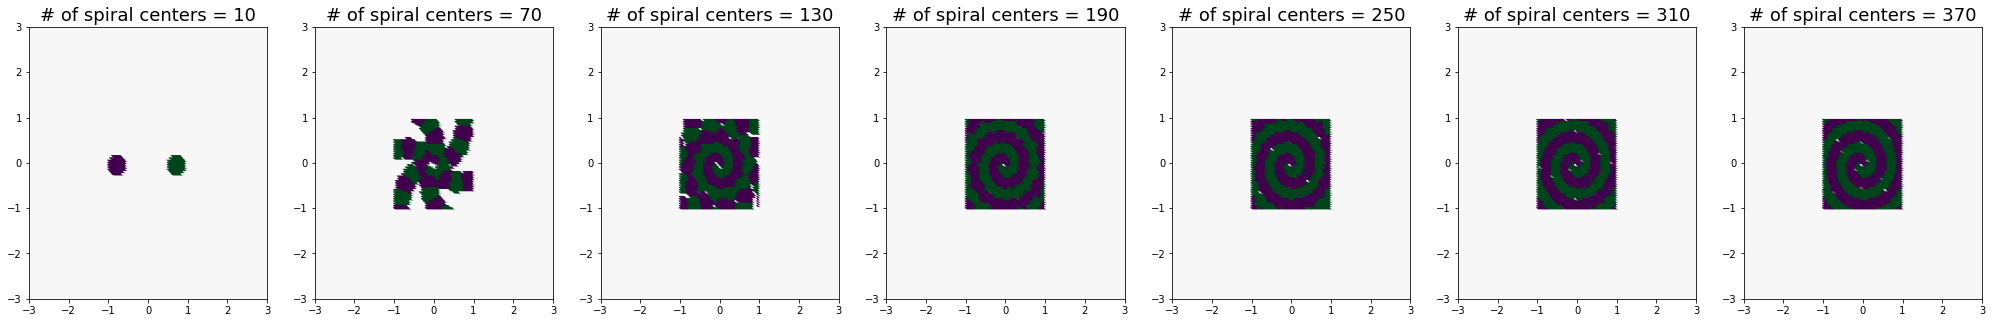

In [6]:
n_spiralcenter = np.arange(10,400, 20)[::3]

fig, axs = plt.subplots(1, n_spiralcenter.size, figsize=(5*n_spiralcenter.size,5))

for i, spirals in enumerate(n_spiralcenter):
    temp = ib.true_spiral(spirals=spirals, h=0.05)
    axs[i].scatter(x=temp[0], y=temp[1], c=temp[2], cmap=cmap)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[i].set_title(f'# of spiral centers = {spirals}',fontsize=18)

Actual spiral posterior is more compact (ie lower `h` is used, namely 0.01 instead of 0.05 used for demonstration purpose)

## Generates a new set of posterior by `ib.get_posterior`
generation of all true posterior is done by calling a single method

In [7]:
kwargs = {'h': 0.01, 'sig':0.25, 'rng':3, 'spirals':400}

# ib.get_posterior(**kwargs)

## Saves the current posterior by 'load_posterior'

In [8]:
# ib.load_posterior(save=True)

## Loads previously saved set of posterior

In [9]:
ib.load_posterior()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded


## True posterior within square bbox

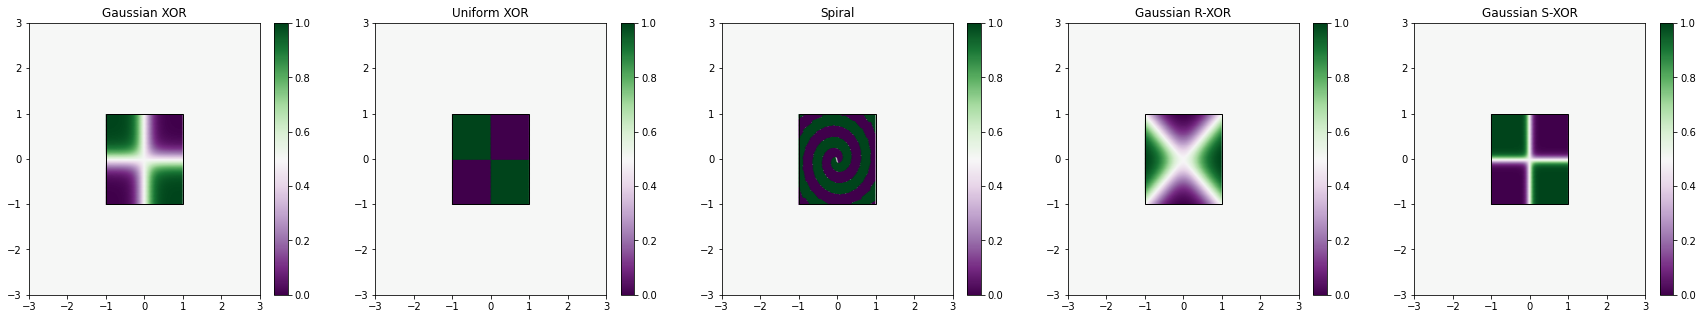

In [10]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[0][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Rectangle(xy=(-1,-1), width=2, height=2, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);

## True posterior within circular bbox

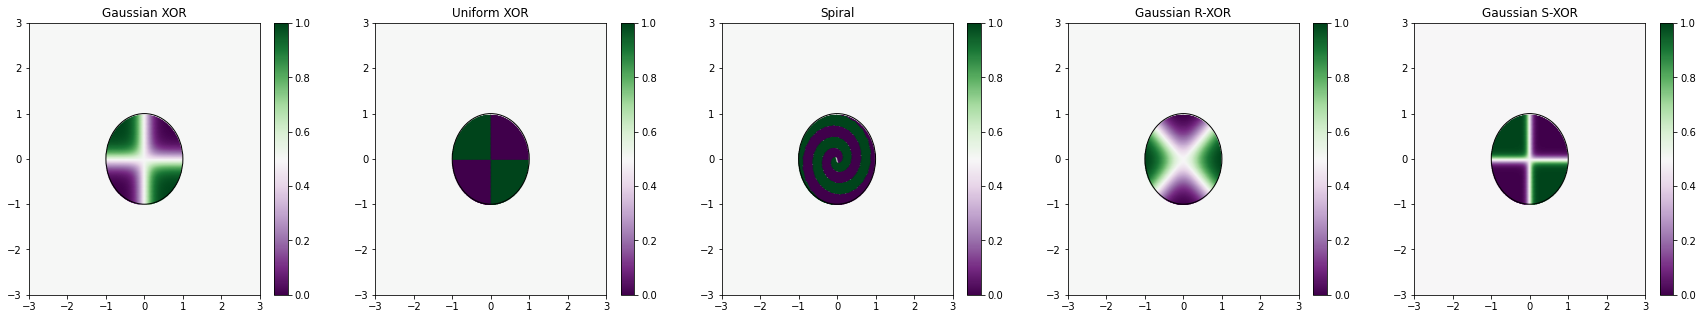

In [11]:
fig, axs = plt.subplots(1,5, figsize=(6*5,5))

for i in range(5):
    tx, ty, tc = ib.truepst[1][i]

    mlp = axs[i].scatter(tx,ty, c=tc, s=1, cmap='PRGn')
    fig.colorbar(mlp, ax=axs[i])
    axs[i].set_title(ib.dtype[i])
    axs[i].add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))
    axs[i].set_xlim([-3,3]);
    axs[i].set_ylim([-3,3]);

## True spiral posterior for human behavioral experiment
True spiral posterior for human experiment has to be in sync with spiral simulation data, meaning both distribution must overlay as perfectly as possible. Below is the demonstration of this idea. One class of simulation dataset has to populate within the range of one class from true posterior. For instance, purple (simulation dataset) is only on the white (true posterior), and green (simulation dataset) is only on the black (true posterior).

In [31]:
import pickle

filename = 'clf/spiral.pickle'

with open(filename, 'rb') as f:
    tx,ty,tc = pickle.load(f)

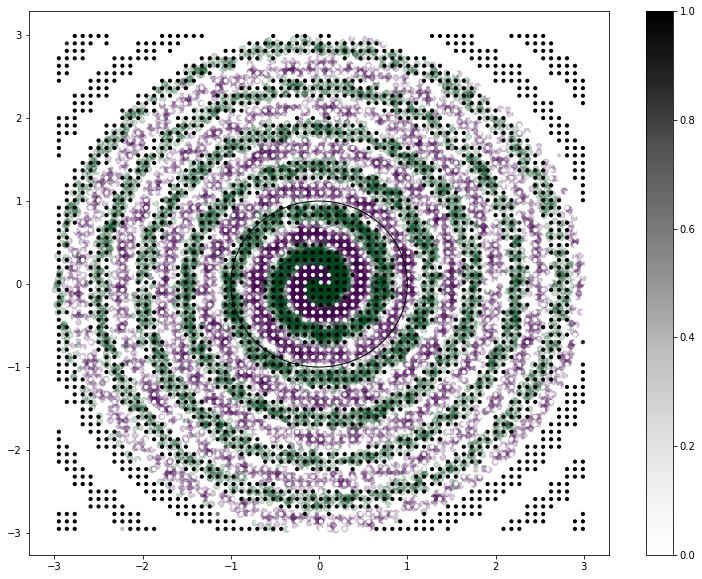

In [33]:
fig, ax = plt.subplots(figsize=(13,10))

a,b = ib.generate_spirals(12750, K=2, noise=1.5,density=0.5,rng=3)
ax.scatter(a[:,0],a[:,1],c=b,alpha=0.2,cmap='PRGn')

mlp = ax.scatter(tx,ty, c=tc, s=10, cmap='Greys')
fig.colorbar(mlp)
ax.add_patch(Circle((0,0), radius=1, edgecolor='k', fill=False))